<a href="https://colab.research.google.com/github/harshshaw/Machine-learning-Projects/blob/main/Demand_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("train.csv")
data.head(  )

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


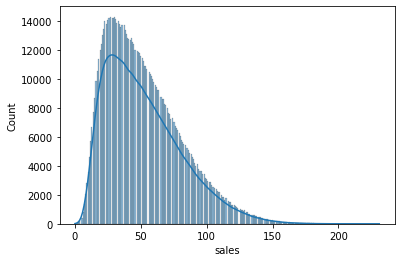

In [ ]:
sn.histplot(data=data,x="sales",kde=True)


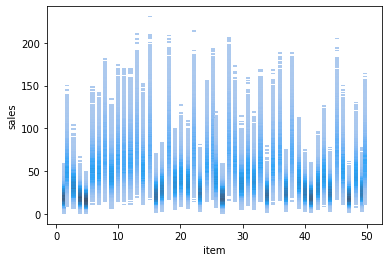

In [ ]:
sn.histplot(data=data,x="item",y="sales")

In [ ]:
print(data.isnull().sum())

date     0
store    0
item     0
sales    0
dtype: int64


In [ ]:
print(data['date'].dtype)

object


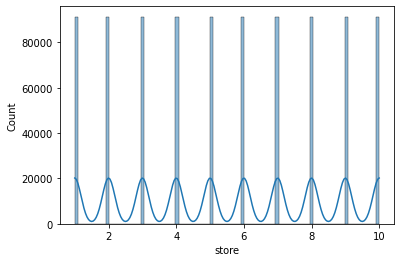

In [ ]:
sn.histplot(data=data,x='store',kde=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data=data.drop(['date'],axis=1)

In [ ]:
data.fillna(data.mean(),inplace=True)
X=data.iloc[:,:-1].values

y=data.iloc[:,-1].values
print(X.shape)

print(y.shape)


(913000, 2)
(913000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
pd.DataFrame(X)

,0,1
0,-1.566699,-1.697749
1,-1.566699,-1.697749
2,-1.566699,-1.697749
3,-1.566699,-1.697749
4,-1.566699,-1.697749
...,...,...
912995,1.566699,1.697749
912996,1.566699,1.697749
912997,1.566699,1.697749
912998,1.566699,1.697749


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(182600, 2)
(730400, 2)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.metrics import mean_squared_log_error, median_absolute_error
from xgboost import XGBRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
R2_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mdabse = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [ ]:
print("Model R2 score:",R2_score)
print("Mean absolute error:",mae)
print("Mean squared log error:",msle)
print("median absolute error:",mdabse)
print("mean squared error:",rmse)



Model R2 score: 0.0031328874589378053
Mean absolute error: 23.111081918957293
Mean squared log error: 0.35873168176808545
median absolute error: 20.62290031379611
mean squared error: 28.761605856506073


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=1000)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
score=r2_score(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mdabse = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("Model R2 score:",R2_score)
print("Mean absolute error:",mae)
print("Mean squared log error:",msle)
print("median absolute error:",mdabse)
print("mean squared error:",rmse)

Model R2 score: 0.6955641121167142
Mean absolute error: 11.92559767859915
Mean squared log error: 0.09089268156879722
median absolute error: 9.052325581395348
mean squared error: 15.894337106310903


In [ ]:
regressor=RandomForestRegressor(random_state=42,n_jobs=-1)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
score=r2_score(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mdabse = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("Model R2 score:",R2_score)
print("Mean absolute error:",mae)
print("Mean squared log error:",msle)
print("median absolute error:",mdabse)
print("mean squared error:",rmse)

Model R2 score: 0.6955453863721854
Mean absolute error: 11.92567725971201
Mean squared log error: 0.09088863939139895
median absolute error: 9.058660531044879
mean squared error: 15.894825926340445


In [ ]:
regressor = XGBRegressor(random_state=42, n_jobs=-1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score=r2_score(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mdabse = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

[14:08:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("Model R2 score:",R2_score)
print("Mean absolute error:",mae)
print("Mean squared log error:",msle)
print("median absolute error:",mdabse)
print("mean squared error:",rmse)

Model R2 score: 0.604540492097968
Mean absolute error: 13.710448261481126
Mean squared log error: 0.1259323527651073
median absolute error: 10.901134490966797
mean squared error: 18.11529901748187


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred = regressor.predict(poly_reg.transform(X_test))
score=r2_score(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mdabse = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("Model R2 score:",R2_score)
print("Mean absolute error:",mae)
print("Mean squared log error:",msle)
print("median absolute error:",mdabse)
print("mean squared error:",rmse)

Model R2 score: 0.057974492784488296
Mean absolute error: 22.451894052711317
Mean squared log error: 0.3352257382830095
median absolute error: 19.905509439444117
mean squared error: 27.959269959208832
